# Importimised

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import numpy as np

In [2]:
#!pip install pandas openpyxl

In [39]:
pd.set_option('display.max_columns', None)  # or 1000
#pd.set_option('display.max_rows', None)  # or 1000


# sisselugemised

In [2]:
#excel file 1
EEB_samples = pd.ExcelFile('EEB_samples.xlsx') #file

sample = EEB_samples.parse('full_table') #sheet name
#samples_reynoutria = EEB_samples.parse('reynoutria') 
#samples_solidago = EEB_samples.parse('solidago') 

#excel file 2
EEB_soil_chemistry = pd.ExcelFile('EEB_soil_chemistry.xlsx')

soil = EEB_soil_chemistry.parse('Sheet1')

#excel file 3
plant_survey = pd.ExcelFile('Plant_survey_2023_final.xlsx') 

plant = plant_survey.parse('Sheet1')

### eemaldame soil failist ühikute rea

In [3]:
soil=soil.iloc[1:] #eemaldasin ühikute rea
soil= soil.reset_index(drop=True)

# asjalik

In [5]:
#plant['liigirikkus'] = plant.apply(lambda row: (row != 0).sum(), axis=1)

In [6]:
#plt.plot(plant.liigirikkus,plant.Reynoutria_japonica,'mo')
#plt.plot(plant.liigirikkus,plant.Solidago_canadensis,'co')
#plt.title('Liigirikkus vs invasiivse liigi katvus')
#plt.show()

# keskmised

 - 123 inv
 - 456trans
 - 789nat

EEB-RJ1-1  

RJ taga indeks on 1 kuni 13


EEB-SC1-1

SC taga indeks 1 kuni 11


viimane indeks 1-9 kõigil

In [4]:
#muudame nimesid
for i in range (1,14):
    for j in range(1,10):
        plant[plant['sample']=='EEB-RJ{}-{}'.format(i, j)]
        if j in range(1, 4):
            plant.loc[plant['sample'] == 'EEB-RJ{}-{}'.format(i, j), 'sample'] = 'INV-{}-R'.format(i)
        if j in range(4, 7): 
            plant.loc[plant['sample'] == 'EEB-RJ{}-{}'.format(i, j), 'sample'] = 'TRANS-{}-R'.format(i)
        if j in range(7, 10): 
            plant.loc[plant['sample'] == 'EEB-RJ{}-{}'.format(i, j), 'sample'] = 'NAT-{}-R'.format(i)
            
            
for i in range (1,12):
    for j in range(1,10):
        plant[plant['sample']=='EEB-SC{}-{}'.format(i, j)]
        if j in range(1, 4):
            plant.loc[plant['sample'] == 'EEB-SC{}-{}'.format(i, j), 'sample'] = 'INV-{}-S'.format(i)
        if j in range(4, 7): 
            plant.loc[plant['sample'] == 'EEB-SC{}-{}'.format(i, j), 'sample'] = 'TRANS-{}-S'.format(i)
        if j in range(7, 10): 
            plant.loc[plant['sample'] == 'EEB-SC{}-{}'.format(i, j), 'sample'] = 'NAT-{}-S'.format(i)

In [5]:
mean_df = plant.groupby('sample').mean()

# ......

In [93]:
sample.columns

Index(['new_code', 'project', 'plant_sp', 'sampling_area(on_bag)', 'treatment',
       'sampling_area_nr', 'gradient', 'grad_nr', 'plant_nr', 'expert', 'area',
       'lat', 'lon', 'status _dna_extraction'],
      dtype='object')

In [95]:
#koordinaatide dataframe
koord_df=sample[['new_code','lat', 'lon']]
koord_df

,new_code,lat,lon
0,EEB-RJ1-1,58.858114,26.931854
1,EEB-RJ1-2,58.858114,26.931854
2,EEB-RJ1-3,58.858114,26.931854
3,EEB-RJ1-4,58.858114,26.931854
4,EEB-RJ1-5,58.858114,26.931854
...,...,...,...
211,EEB-SC11-5,58.060173,22.207555
212,EEB-SC11-6,58.060173,22.207555
213,EEB-SC11-7,58.060173,22.207555
214,EEB-SC11-8,58.060173,22.207555


In [96]:
# vahetame koordinaatide dataframes ka nimesid
#muudame nimesid
for i in range (1,14):
    for j in range(1,10):
        koord_df[koord_df['new_code']=='EEB-RJ{}-{}'.format(i, j)]
        if j in range(1, 4):
            koord_df.loc[koord_df['new_code'] == 'EEB-RJ{}-{}'.format(i, j), 'new_code'] = 'INV-{}-R'.format(i)
        if j in range(4, 7): 
            koord_df.loc[koord_df['new_code'] == 'EEB-RJ{}-{}'.format(i, j), 'new_code'] = 'TRANS-{}-R'.format(i)
        if j in range(7, 10): 
            koord_df.loc[koord_df['new_code'] == 'EEB-RJ{}-{}'.format(i, j), 'new_code'] = 'NAT-{}-R'.format(i)
            
            
for i in range (1,12):
    for j in range(1,10):
        koord_df[koord_df['new_code']=='EEB-SC{}-{}'.format(i, j)]
        if j in range(1, 4):
            koord_df.loc[koord_df['new_code'] == 'EEB-SC{}-{}'.format(i, j), 'new_code'] = 'INV-{}-S'.format(i)
        if j in range(4, 7): 
            koord_df.loc[koord_df['new_code'] == 'EEB-SC{}-{}'.format(i, j), 'new_code'] = 'TRANS-{}-S'.format(i)
        if j in range(7, 10): 
            koord_df.loc[koord_df['new_code'] == 'EEB-SC{}-{}'.format(i, j), 'new_code'] = 'NAT-{}-S'.format(i)

In [97]:
koord_df

,new_code,lat,lon
0,INV-1-R,58.858114,26.931854
1,INV-1-R,58.858114,26.931854
2,INV-1-R,58.858114,26.931854
3,TRANS-1-R,58.858114,26.931854
4,TRANS-1-R,58.858114,26.931854
...,...,...,...
211,TRANS-11-S,58.060173,22.207555
212,TRANS-11-S,58.060173,22.207555
213,NAT-11-S,58.060173,22.207555
214,NAT-11-S,58.060173,22.207555


In [102]:
koord=koord_df.groupby('new_code').mean()

In [104]:
koord

,lat,lon
new_code,,
INV-1-R,58.858114,26.931854
INV-1-S,58.777722,26.309980
INV-10-R,58.278045,22.500830
INV-10-S,58.255485,22.473204
INV-11-R,58.259786,22.512229
...,...,...
TRANS-7-S,59.385577,24.728316
TRANS-8-R,59.434088,24.685018
TRANS-8-S,59.434088,24.685018


# ---------

In [6]:

kogu_katvus=mean_df.T.sum()
kogu_katvus

sample
INV-1-R      105.166667
INV-1-S       91.666667
INV-10-R      77.000000
INV-10-S      96.333333
INV-11-R      99.333333
                ...    
TRANS-7-S     87.000000
TRANS-8-R     73.333333
TRANS-8-S     88.000000
TRANS-9-R    119.333333
TRANS-9-S     32.000000
Length: 72, dtype: float64

In [7]:
invasiivsed=mean_df[['Reynoutria_japonica', 'Solidago_canadensis']]
invasiivsed

,Reynoutria_japonica,Solidago_canadensis
sample,,
INV-1-R,86.666667,0.000000
INV-1-S,0.000000,0.000000
INV-10-R,71.666667,0.000000
INV-10-S,0.000000,87.333333
INV-11-R,91.666667,0.000000
...,...,...
TRANS-7-S,0.000000,25.000000
TRANS-8-R,25.000000,0.000000
TRANS-8-S,0.000000,30.000000


In [8]:
tavalised=mean_df.drop(['Reynoutria_japonica', 'Solidago_canadensis'],axis=1)
tavaliste_katvus=tavalised.T.sum()


In [9]:
invasiivsete_katvus=invasiivsed.T.sum()
invasiivsete_katvus

sample
INV-1-R      86.666667
INV-1-S       0.000000
INV-10-R     71.666667
INV-10-S     87.333333
INV-11-R     91.666667
               ...    
TRANS-7-S    25.000000
TRANS-8-R    25.000000
TRANS-8-S    30.000000
TRANS-9-R    25.000000
TRANS-9-S    11.333333
Length: 72, dtype: float64

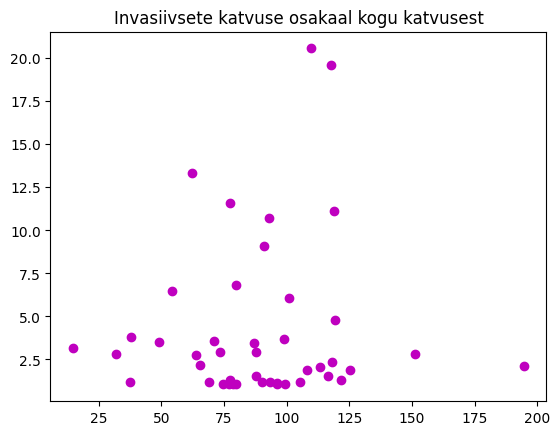

In [10]:
plt.plot(kogu_katvus,kogu_katvus/invasiivsete_katvus,'mo')
plt.title('Invasiivsete katvuse osakaal kogu katvusest')
plt.show()

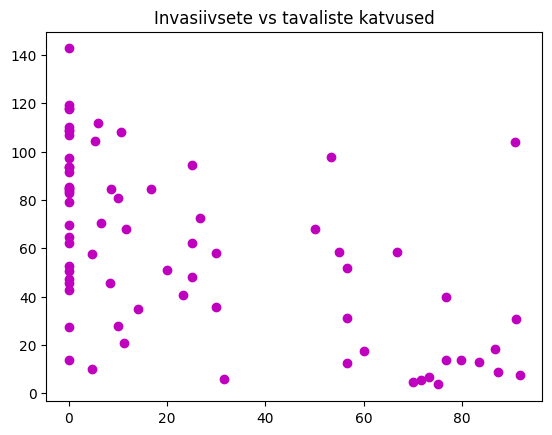

In [11]:
plt.plot(invasiivsete_katvus,tavaliste_katvus,'mo')
plt.title('Invasiivsete vs tavaliste katvused')
plt.show()

In [12]:
#mean_df=mean_df.T
distances = pairwise_distances(mean_df.values)

# Convert the distances matrix to a DataFrame for better visualization
distances_df = pd.DataFrame(distances, index=mean_df.index, columns=mean_df.index)
distances_df

sample,INV-1-R,INV-1-S,INV-10-R,INV-10-S,INV-11-R,INV-11-S,INV-12-R,INV-13-R,INV-2-R,INV-2-S,...,TRANS-5-R,TRANS-5-S,TRANS-6-R,TRANS-6-S,TRANS-7-R,TRANS-7-S,TRANS-8-R,TRANS-8-S,TRANS-9-R,TRANS-9-S
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,0.000000,102.598868,24.088379,124.521417,16.863010,125.939249,81.503408,20.643132,36.628010,117.293909,...,85.861646,95.569783,81.650509,98.988916,69.200393,93.636561,63.276510,93.198265,90.939082,89.383848
INV-1-S,102.598868,0.000000,90.695155,103.524823,106.945209,106.150574,138.237919,93.111343,79.918535,95.698891,...,74.370506,61.037784,64.680840,70.824117,62.553533,61.742746,61.271255,66.091267,95.548998,56.254876
INV-10-R,24.088379,90.695155,0.000000,112.992625,20.207259,116.720940,101.602165,5.744563,18.697148,107.265248,...,85.030550,80.259302,74.961472,84.301707,60.929832,77.947276,49.843087,84.225227,97.183103,72.910143
INV-10-S,124.521417,103.524823,112.992625,0.000000,126.660965,15.151091,160.698130,115.265394,104.761236,118.358448,...,106.782619,65.345237,97.746270,91.896681,95.272708,64.831405,92.495646,65.970532,124.596683,76.401716
INV-11-R,16.863010,106.945209,20.207259,126.660965,0.000000,129.718070,97.136788,17.146428,36.762375,121.283186,...,98.543702,98.536513,91.061640,101.852835,77.675250,96.664943,68.494931,100.989548,106.104770,92.635486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,93.636561,61.742746,77.947276,64.831405,96.664943,69.539757,138.152492,80.921773,65.090749,84.556030,...,68.007965,23.414146,52.995807,48.491695,48.657533,0.000000,43.582616,36.269056,93.746111,21.758779
TRANS-8-R,63.276510,61.271255,49.843087,92.495646,68.494931,95.147254,109.331301,53.114133,37.890559,83.696210,...,50.425688,47.580341,37.360109,54.113050,24.260164,43.582616,0.000000,45.995169,73.019023,33.349996
TRANS-8-S,93.198265,66.091267,84.225227,65.970532,100.989548,64.755094,118.845371,86.524242,72.493103,86.923657,...,45.550643,39.568506,40.398020,58.983990,41.048752,36.269056,45.995169,0.000000,68.574372,37.196177


C:\Anaconda\envs\IDS\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


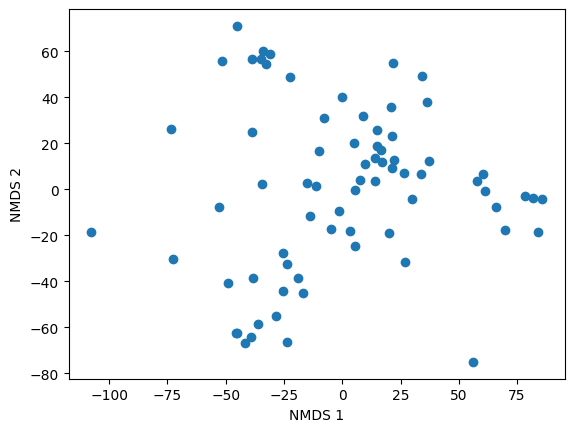

In [13]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, dissimilarity='precomputed')
embedding = mds.fit_transform(distances_df)

plt.scatter(embedding[:, 0], embedding[:, 1])
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.show()

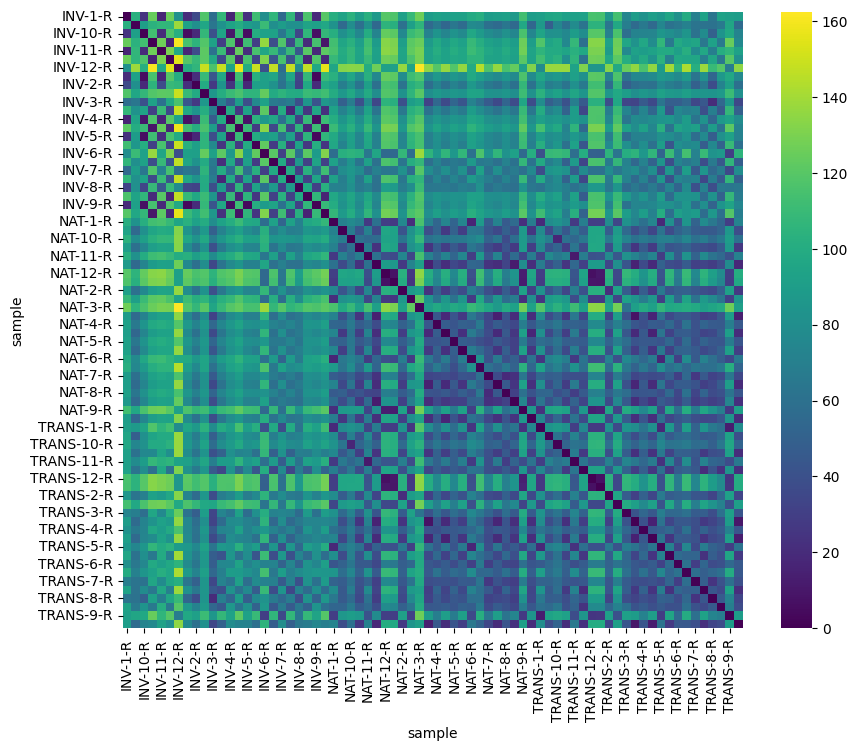

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'distances_df' is your DataFrame with the pairwise distances
plt.figure(figsize=(10, 8))
sns.heatmap(distances_df, cmap='viridis')
plt.show()

In [15]:
distances1 = pairwise_distances(invasiivsed.values)

# Convert the distances matrix to a DataFrame for better visualization
distances_df1 = pd.DataFrame(distances1, index=invasiivsed.index, columns=invasiivsed.index)
distances_df1

sample,INV-1-R,INV-1-S,INV-10-R,INV-10-S,INV-11-R,INV-11-S,INV-12-R,INV-13-R,INV-2-R,INV-2-S,...,TRANS-5-R,TRANS-5-S,TRANS-6-R,TRANS-6-S,TRANS-7-R,TRANS-7-S,TRANS-8-R,TRANS-8-S,TRANS-9-R,TRANS-9-S
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,0.000000,86.666667,15.000000,123.037483,5.000000,125.666667,4.000000,11.666667,30.000000,86.666667,...,75.000000,90.676470,76.666667,86.922699,66.666667,90.200394,61.666667,91.712110,61.666667,87.404551
INV-1-S,86.666667,0.000000,71.666667,87.333333,91.666667,91.000000,90.666667,75.000000,56.666667,0.000000,...,11.666667,26.666667,10.000000,6.666667,20.000000,25.000000,25.000000,30.000000,25.000000,11.333333
INV-10-R,15.000000,71.666667,0.000000,112.974432,20.000000,115.832254,19.000000,3.333333,15.000000,71.666667,...,60.000000,76.467132,61.666667,71.976076,51.666667,75.901984,46.666667,77.692413,46.666667,72.557257
INV-10-S,123.037483,87.333333,112.974432,0.000000,126.609197,3.666667,125.887075,115.117814,104.106783,87.333333,...,88.109149,60.666667,87.903988,80.666667,89.594147,62.333333,90.841131,57.333333,90.841131,76.000000
INV-11-R,5.000000,91.666667,20.000000,126.609197,0.000000,129.165699,1.000000,16.666667,35.000000,91.666667,...,80.000000,95.466690,81.666667,91.908771,71.666667,95.014619,66.666667,96.450909,66.666667,92.364616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,90.200394,25.000000,75.901984,62.333333,95.014619,66.000000,94.050223,79.056942,61.936347,25.000000,...,27.588242,1.666667,26.925824,18.333333,32.015621,0.000000,35.355339,5.000000,35.355339,13.666667
TRANS-8-R,61.666667,25.000000,46.666667,90.841131,66.666667,94.371606,65.666667,50.000000,31.666667,25.000000,...,13.333333,36.552854,15.000000,25.873624,5.000000,35.355339,0.000000,39.051248,0.000000,27.448943
TRANS-8-S,91.712110,30.000000,77.692413,57.333333,96.450909,61.000000,95.501018,80.777472,64.117947,30.000000,...,32.188680,3.333333,31.622777,23.333333,36.055513,5.000000,39.051248,0.000000,39.051248,18.666667


In [16]:
distances2 = pairwise_distances(tavalised.values)

# Convert the distances matrix to a DataFrame for better visualization
distances_df2 = pd.DataFrame(distances2, index=tavalised.index, columns=tavalised.index)
distances_df2

sample,INV-1-R,INV-1-S,INV-10-R,INV-10-S,INV-11-R,INV-11-S,INV-12-R,INV-13-R,INV-2-R,INV-2-S,...,TRANS-5-R,TRANS-5-S,TRANS-6-R,TRANS-6-S,TRANS-7-R,TRANS-7-S,TRANS-8-R,TRANS-8-S,TRANS-9-R,TRANS-9-S
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,0.000000,54.912810,18.848077,19.166667,16.104692,8.281505,81.405194,17.030202,21.014545,79.036384,...,41.799787,30.188758,28.089638,47.362960,18.553975,25.133532,14.182344,16.577260,66.836658,18.706060
INV-1-S,54.912810,0.000000,55.583271,55.590267,55.086296,54.652945,104.351702,55.179002,56.354779,95.698891,...,73.449718,54.904462,63.903139,70.509653,59.270097,56.454997,55.938955,58.890199,92.220448,55.101422
INV-10-R,18.848077,55.583271,0.000000,2.027588,2.886751,14.375906,99.809819,4.678556,11.161690,79.810540,...,60.251095,24.378953,42.619766,43.888748,32.295511,17.738846,17.508728,32.523496,85.245397,7.164728
INV-10-S,19.166667,55.590267,2.027588,0.000000,3.620927,14.700718,99.881597,5.830952,11.691640,79.884987,...,60.326657,24.280765,42.746020,44.021459,32.400274,17.823206,17.416467,32.634338,85.277325,7.824463
INV-11-R,16.104692,55.086296,2.886751,3.620927,0.000000,11.958261,97.131640,4.027682,11.245987,79.415574,...,57.540083,24.404007,40.283716,43.895077,29.955523,17.785762,15.719768,29.935115,82.545610,7.078920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,25.133532,56.454997,17.738846,17.823206,17.785762,21.903830,101.196179,17.272329,20.017354,80.775753,...,62.160858,23.354752,45.645981,44.892464,36.640900,0.000000,25.484200,35.922757,86.823576,16.931233
TRANS-8-R,14.182344,55.938955,17.508728,17.416467,15.719768,12.124356,87.414085,17.919573,20.806650,79.875250,...,48.630980,30.459445,34.216630,47.526601,23.739325,25.484200,0.000000,24.301349,73.019023,18.941430
TRANS-8-S,16.577260,58.890199,32.523496,32.634338,29.935115,21.730675,70.737386,31.007168,33.825122,81.582610,...,32.229645,39.427853,25.139610,54.172564,19.621417,35.922757,24.301349,0.000000,56.368825,32.173143


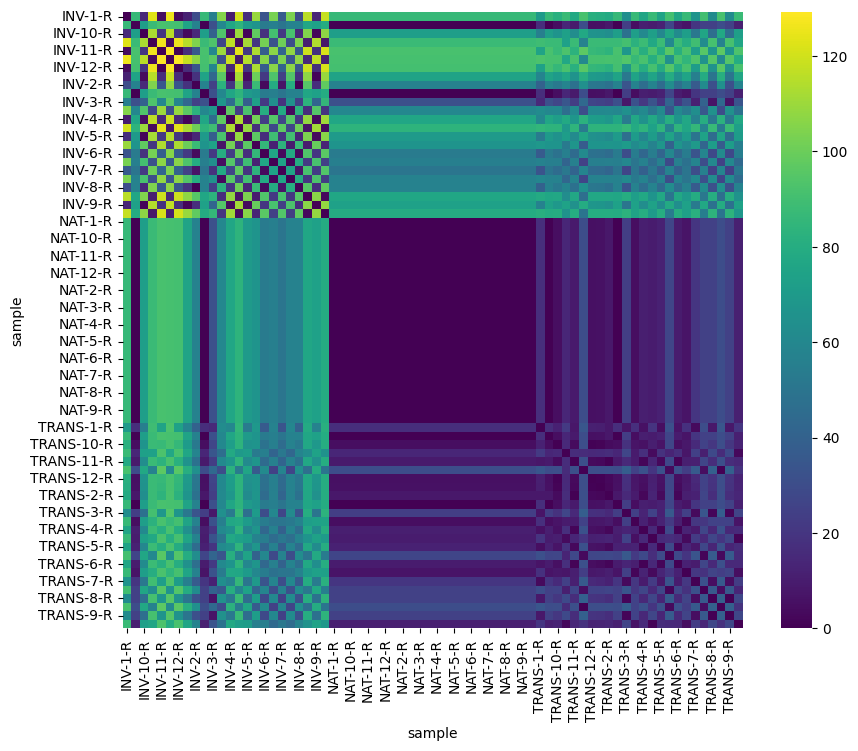

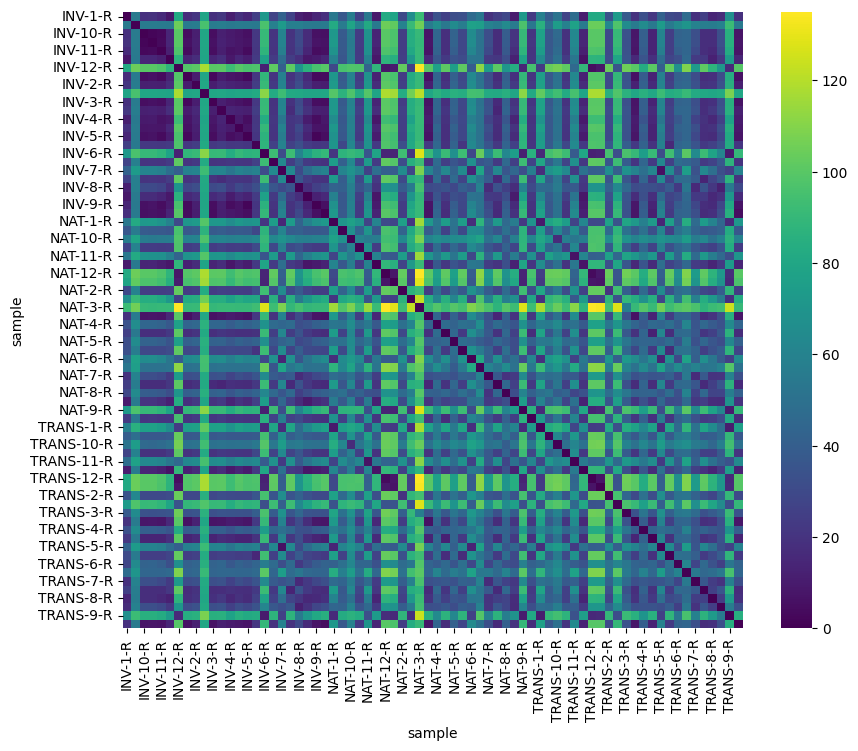

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(distances_df1, cmap='viridis')
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(distances_df2, cmap='viridis')
plt.show()

# liigirikkus

In [18]:
mean_df['liigirikkus'] = mean_df.apply(lambda row: (row != 0).sum(), axis=1)


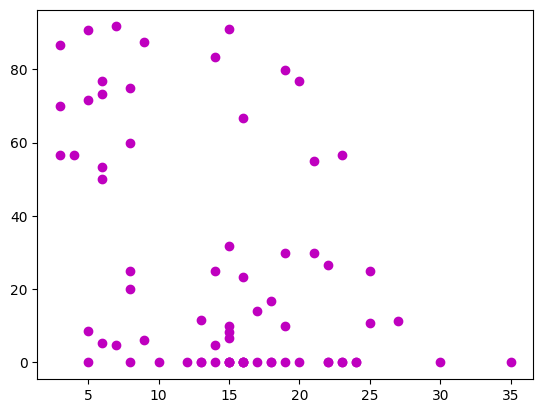

In [19]:
plt.plot(mean_df.liigirikkus,invasiivsete_katvus,'mo')
plt.show()

In [20]:
mean_df.columns

Index(['Reynoutria_japonica', 'Solidago_canadensis', 'Aegopodium_podagraria',
       'Ranunculus_auricomus', 'Alopecurus_pratensis', 'Elymus_repens',
       'Agrostis_capillaris', 'Festuca_rubra', 'Cirsium_arvensis',
       'Taraxacum_officinale',
       ...
       'Daucus_carota', 'Achillea_millefolia', 'Allium_scorodoprasum',
       'Veronica_teucrium', 'Agrimonia_eupatoria', 'Plantago_media',
       'Sonchus_arvensis', 'Prunus_domestica', 'Salix_alba', 'liigirikkus'],
      dtype='object', length=222)

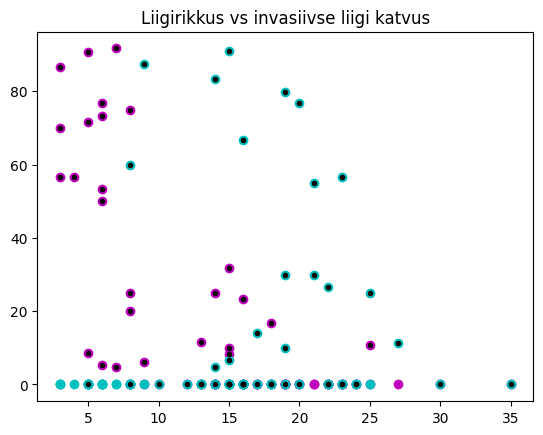

In [21]:
plt.plot(mean_df.liigirikkus,mean_df.Reynoutria_japonica,'mo')
plt.plot(mean_df.liigirikkus,mean_df.Solidago_canadensis,'co')
plt.plot(mean_df.liigirikkus,invasiivsete_katvus,'k.')
plt.title('Liigirikkus vs invasiivse liigi katvus')
plt.show()

# soil

In [22]:
soil.columns

Index(['ala_kood', 'Proovi nimetus', 'Nr.', 'Jrk. nr.', 'pHKCl', 'P-AL',
       'K-AL', 'Ca-AL', 'Mg-AL', 'N -Kjeldahl', 'C-Tjurin'],
      dtype='object')

In [23]:
soil_df=soil[['ala_kood','pHKCl']]
soil_df

,ala_kood,pHKCl
0,EEB-SC2,6.98
1,EEB-SC6,5.98
2,EEB-SC5,6.91
3,EEB-RJ4,6.68
4,EEB-RJ1,6.30
5,EEB-SC1,6.95
6,EEB-RJ3,6.39
7,EEB-SC8,5.62
8,EEB-RJ9,7.23
9,EEB-RJ8,6.46


In [24]:
soil_df[soil_df['ala_kood']=='EEB-RJ{}'.format(3)].pHKCl.values[0]

6.39

In [25]:
for index, row in mean_df.iterrows():
    for i in range(1,14):
        if '{}-R'.format(i) in index:
            mean_df.loc[index, 'pH']=soil_df[soil_df['ala_kood']=='EEB-RJ{}'.format(i)].pHKCl.values[0]
        if '{}-S'.format(i) in index:
            mean_df.loc[index, 'pH']=soil_df[soil_df['ala_kood']=='EEB-SC{}'.format(i)].pHKCl.values[0]

In [27]:
mean_df

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,Achillea_millefolia,Allium_scorodoprasum,Veronica_teucrium,Agrimonia_eupatoria,Plantago_media,Sonchus_arvensis,Prunus_domestica,Salix_alba,liigirikkus,pH
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3,6.30
INV-1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,30,6.95
INV-10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,5,7.15
INV-10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,9,7.11
INV-11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.0,7,7.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,25,7.29
TRANS-8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,14,6.46
TRANS-8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,19,5.62


In [44]:
# for index, row in mean_df.iterrows():
#     if 'INV-' in index:
#         mean_df.loc[index, 'invadeeritus']='INV'
#     if 'TRANS-' in index:
#         mean_df.loc[index, 'invadeeritus']='TRANS'
#     if 'NAT-' in index:
#         mean_df.loc[index, 'invadeeritus']='NAT'

C:\Users\reeli\AppData\Local\Temp\ipykernel_39220\1556100342.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'INV' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  mean_df.loc[index, 'invadeeritus']='INV'


In [48]:
for index, row in mean_df.iterrows():
    if 'INV-' in index:
        mean_df.loc[index, 'invadeeritus']=1
    if 'TRANS-' in index:
        mean_df.loc[index, 'invadeeritus']=2
    if 'NAT-' in index:
        mean_df.loc[index, 'invadeeritus']=3

In [49]:
mean_df

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,Allium_scorodoprasum,Veronica_teucrium,Agrimonia_eupatoria,Plantago_media,Sonchus_arvensis,Prunus_domestica,Salix_alba,liigirikkus,pH,invadeeritus
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3,6.30,1
INV-1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,30,6.95,1
INV-10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,5,7.15,1
INV-10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,9,7.11,1
INV-11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.0,7,7.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,25,7.29,2
TRANS-8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,14,6.46,2
TRANS-8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,19,5.62,2


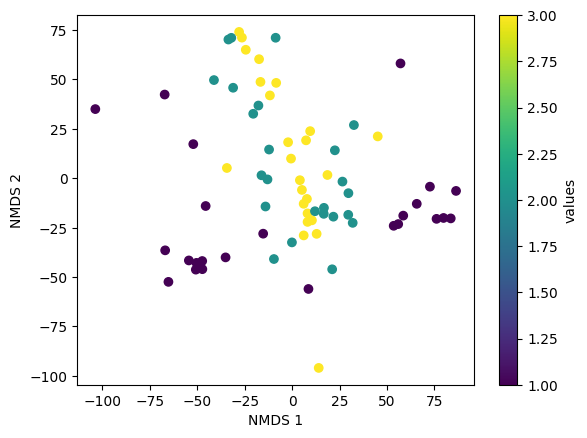

In [56]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress="auto") #normalized_stress=False
embedding = mds.fit_transform(distances_df)
invadeeritus=mean_df.invadeeritus.values

plt.scatter(embedding[:, 0], embedding[:, 1],c=invadeeritus, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')

plt.show()

- 1= INV
- 2=TRANS
- 3=NAT

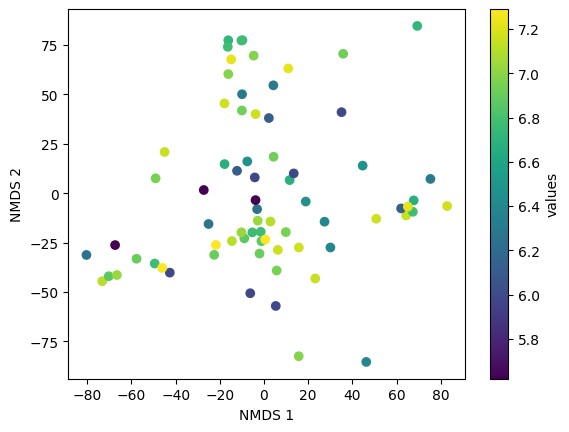

In [43]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress="auto")
embedding = mds.fit_transform(distances_df)
pH=mean_df.pH.values

plt.scatter(embedding[:, 0], embedding[:, 1],c=pH, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')
plt.show()
#stress valued vaadata???
# värvid panna invaded, mitte invaded, transitional

In [39]:
distances_df

sample,INV-1-R,INV-1-S,INV-10-R,INV-10-S,INV-11-R,INV-11-S,INV-12-R,INV-13-R,INV-2-R,INV-2-S,...,TRANS-5-R,TRANS-5-S,TRANS-6-R,TRANS-6-S,TRANS-7-R,TRANS-7-S,TRANS-8-R,TRANS-8-S,TRANS-9-R,TRANS-9-S
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,0.000000,102.598868,24.088379,124.521417,16.863010,125.939249,81.503408,20.643132,36.628010,117.293909,...,85.861646,95.569783,81.650509,98.988916,69.200393,93.636561,63.276510,93.198265,90.939082,89.383848
INV-1-S,102.598868,0.000000,90.695155,103.524823,106.945209,106.150574,138.237919,93.111343,79.918535,95.698891,...,74.370506,61.037784,64.680840,70.824117,62.553533,61.742746,61.271255,66.091267,95.548998,56.254876
INV-10-R,24.088379,90.695155,0.000000,112.992625,20.207259,116.720940,101.602165,5.744563,18.697148,107.265248,...,85.030550,80.259302,74.961472,84.301707,60.929832,77.947276,49.843087,84.225227,97.183103,72.910143
INV-10-S,124.521417,103.524823,112.992625,0.000000,126.660965,15.151091,160.698130,115.265394,104.761236,118.358448,...,106.782619,65.345237,97.746270,91.896681,95.272708,64.831405,92.495646,65.970532,124.596683,76.401716
INV-11-R,16.863010,106.945209,20.207259,126.660965,0.000000,129.718070,97.136788,17.146428,36.762375,121.283186,...,98.543702,98.536513,91.061640,101.852835,77.675250,96.664943,68.494931,100.989548,106.104770,92.635486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,93.636561,61.742746,77.947276,64.831405,96.664943,69.539757,138.152492,80.921773,65.090749,84.556030,...,68.007965,23.414146,52.995807,48.491695,48.657533,0.000000,43.582616,36.269056,93.746111,21.758779
TRANS-8-R,63.276510,61.271255,49.843087,92.495646,68.494931,95.147254,109.331301,53.114133,37.890559,83.696210,...,50.425688,47.580341,37.360109,54.113050,24.260164,43.582616,0.000000,45.995169,73.019023,33.349996
TRANS-8-S,93.198265,66.091267,84.225227,65.970532,100.989548,64.755094,118.845371,86.524242,72.493103,86.923657,...,45.550643,39.568506,40.398020,58.983990,41.048752,36.269056,45.995169,0.000000,68.574372,37.196177


In [37]:
embedding

array([[ 73.71159503,  16.08426474],
       [-54.61502832, -10.47656877],
       [ 64.76935372,  -2.96657296],
       [-21.16000367, -83.57527012],
       [ 82.68950695,   3.58380206],
       [-32.83363358, -80.8181645 ],
       [ 59.98520195,  91.42739196],
       [ 67.56016605,  -0.91474998],
       [ 51.55833457,  -6.21617441],
       [-83.99043224,  -2.18571046],
       [ 28.91372763,  -9.8937287 ],
       [ -9.26942525, -61.02806937],
       [ 67.34347282,   4.71959159],
       [-18.67811086, -80.30273039],
       [ 62.13757945,   0.14710042],
       [-21.04326425, -63.9807951 ],
       [ 26.89810507,  74.52033926],
       [-14.4902259 , -56.12978397],
       [ 29.48845751,  45.48406519],
       [ -4.10472846, -59.97440552],
       [ 42.47052557,  19.73151772],
       [-29.2615527 , -67.41571792],
       [ 65.05793671,   1.34369008],
       [-17.31733846, -77.00192429],
       [-16.70334852,  49.1305099 ],
       [-22.7973237 , -11.07022949],
       [-52.62604353,  10.25517072],
 

C:\Anaconda\envs\IDS\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


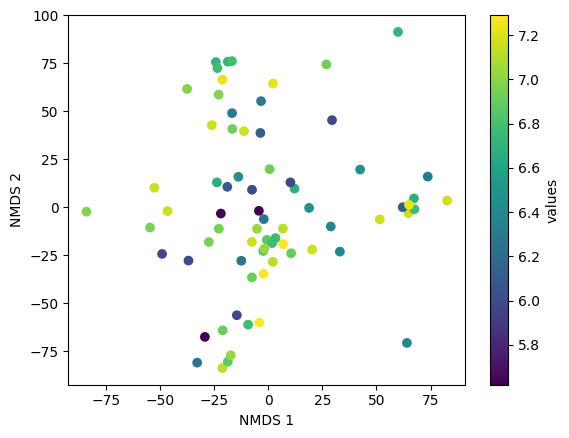

In [34]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, dissimilarity='precomputed')
embedding = mds.fit_transform(distances_df)
pH=mean_df.pH.values

plt.scatter(embedding[:, 0], embedding[:, 1],c=pH, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')
plt.show()

In [57]:
#!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/18/09/8569904c8ce5679cc02826d98de633c07abcd2443a23181e5f71ff9dacbc/folium-0.15.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/2f/e7/603b136221de923055716d23e3047da71f92e0d8ba2c4517ce49a54fe768/branca-0.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for xyzservices from https://files.pythonhosted.org/packages/82/c3/e06dfa46464cce3eda4b86df8847cab99d9bc545c76807ee689545187a4c/xyzservices-2023.10.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/97.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/97.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/97.0 kB ? eta -:--:--
   ------------ --------------------------- 30.7/97.0 kB 325.1 kB/s eta 0:00:01
   ------------ --------------------------- 30.7/97.0 kB 325.1 kB/s eta 0:00:01
   --------

In [59]:
sample

,new_code,project,plant_sp,sampling_area(on_bag),treatment,sampling_area_nr,gradient,grad_nr,plant_nr,expert,area,lat,lon,status _dna_extraction
0,EEB-RJ1-1,EEB,RJ,Mustvee,control,1,invaded,1,1,Kadri,E,58.858114,26.931854,NaN
1,EEB-RJ1-2,EEB,RJ,Mustvee,control,1,invaded,2,2,Kadri,E,58.858114,26.931854,NaN
2,EEB-RJ1-3,EEB,RJ,Mustvee,control,1,invaded,3,3,Kadri,E,58.858114,26.931854,NaN
3,EEB-RJ1-4,EEB,RJ,Mustvee,control,1,transitional,1,4,Kadri,E,58.858114,26.931854,NaN
4,EEB-RJ1-5,EEB,RJ,Mustvee,control,1,transitional,2,5,Kadri,E,58.858114,26.931854,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,EEB-SC11-5,EEB,SC,Kaimri,mown,11,transitional,2,5,Oliver,W,58.060173,22.207555,NaN
212,EEB-SC11-6,EEB,SC,Kaimri,mown,11,transitional,3,6,Oliver,W,58.060173,22.207555,NaN
213,EEB-SC11-7,EEB,SC,Kaimri,mown,11,natural,1,7,Oliver,W,58.060173,22.207555,NaN
214,EEB-SC11-8,EEB,SC,Kaimri,mown,11,natural,2,8,Oliver,W,58.060173,22.207555,NaN


In [107]:
mean_df

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,Allium_scorodoprasum,Veronica_teucrium,Agrimonia_eupatoria,Plantago_media,Sonchus_arvensis,Prunus_domestica,Salix_alba,liigirikkus,pH,invadeeritus
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3,6.30,1
INV-1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,30,6.95,1
INV-10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,5,7.15,1
INV-10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,9,7.11,1
INV-11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.0,7,7.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,25,7.29,2
TRANS-8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,14,6.46,2
TRANS-8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,19,5.62,2


In [105]:
koord

,lat,lon
new_code,,
INV-1-R,58.858114,26.931854
INV-1-S,58.777722,26.309980
INV-10-R,58.278045,22.500830
INV-10-S,58.255485,22.473204
INV-11-R,58.259786,22.512229
...,...,...
TRANS-7-S,59.385577,24.728316
TRANS-8-R,59.434088,24.685018
TRANS-8-S,59.434088,24.685018


In [106]:
import folium

# Create a map centered at an initial location
initial_latitude=58.595272
initial_longitude=25.013607
map = folium.Map(location=[initial_latitude, initial_longitude], zoom_start=7)

# Add points to the map
for index, row in koord.iterrows():
    folium.Marker([row['lat'], row['lon']]).add_to(map)

# Display the map
map

In [68]:
mean_df.columns

Index(['Reynoutria_japonica', 'Solidago_canadensis', 'Aegopodium_podagraria',
       'Ranunculus_auricomus', 'Alopecurus_pratensis', 'Elymus_repens',
       'Agrostis_capillaris', 'Festuca_rubra', 'Cirsium_arvensis',
       'Taraxacum_officinale',
       ...
       'Allium_scorodoprasum', 'Veronica_teucrium', 'Agrimonia_eupatoria',
       'Plantago_media', 'Sonchus_arvensis', 'Prunus_domestica', 'Salix_alba',
       'liigirikkus', 'pH', 'invadeeritus'],
      dtype='object', length=224)

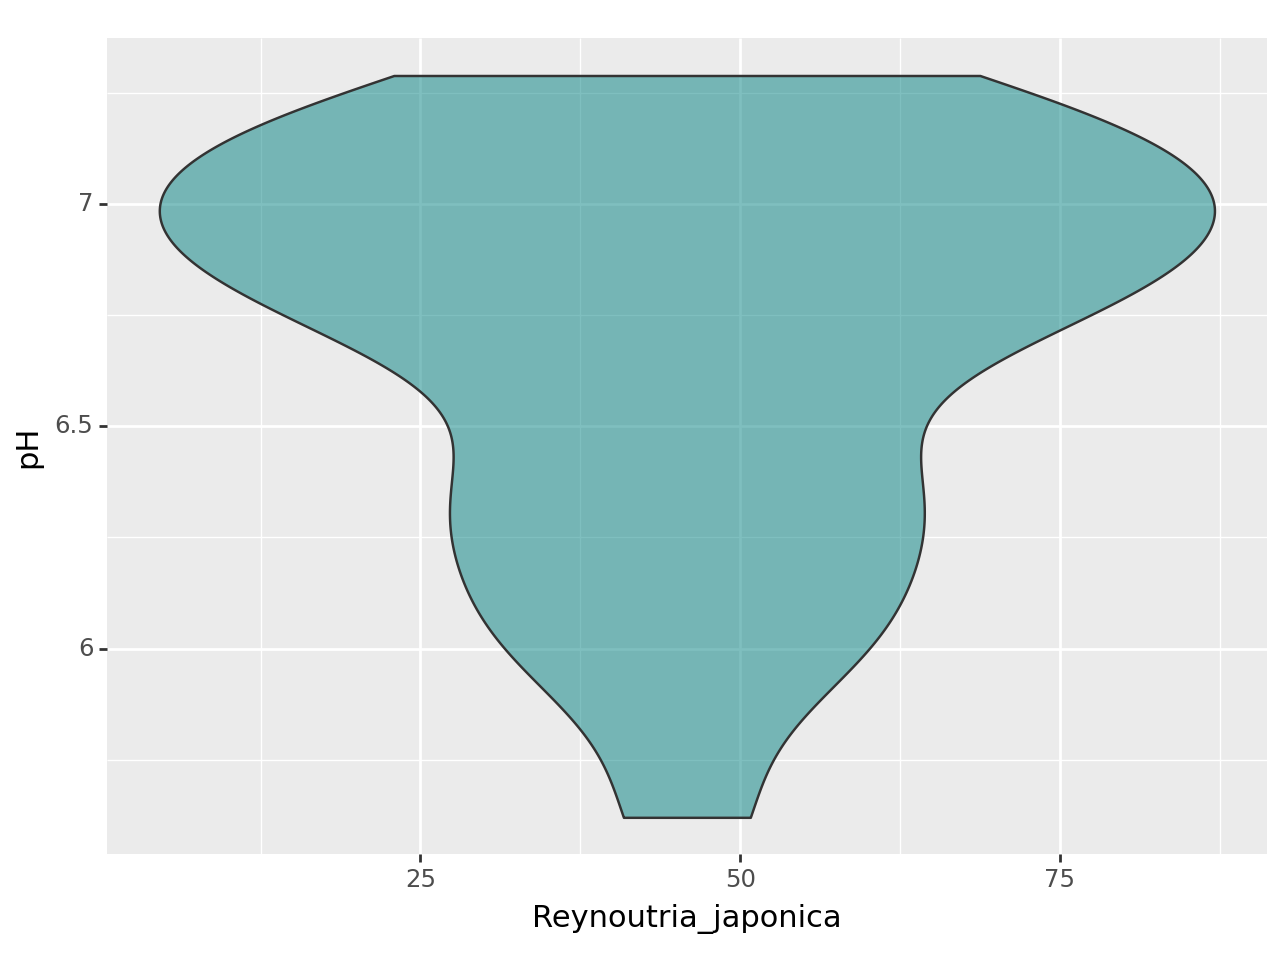

<Figure Size: (640 x 480)>

In [77]:
import plotnine as p9

(p9.ggplot(
    data = mean_df, 
    mapping = p9.aes(x = 'Reynoutria_japonica', y = 'pH')
) + 
    p9.geom_violin(fill='teal',alpha=0.5))


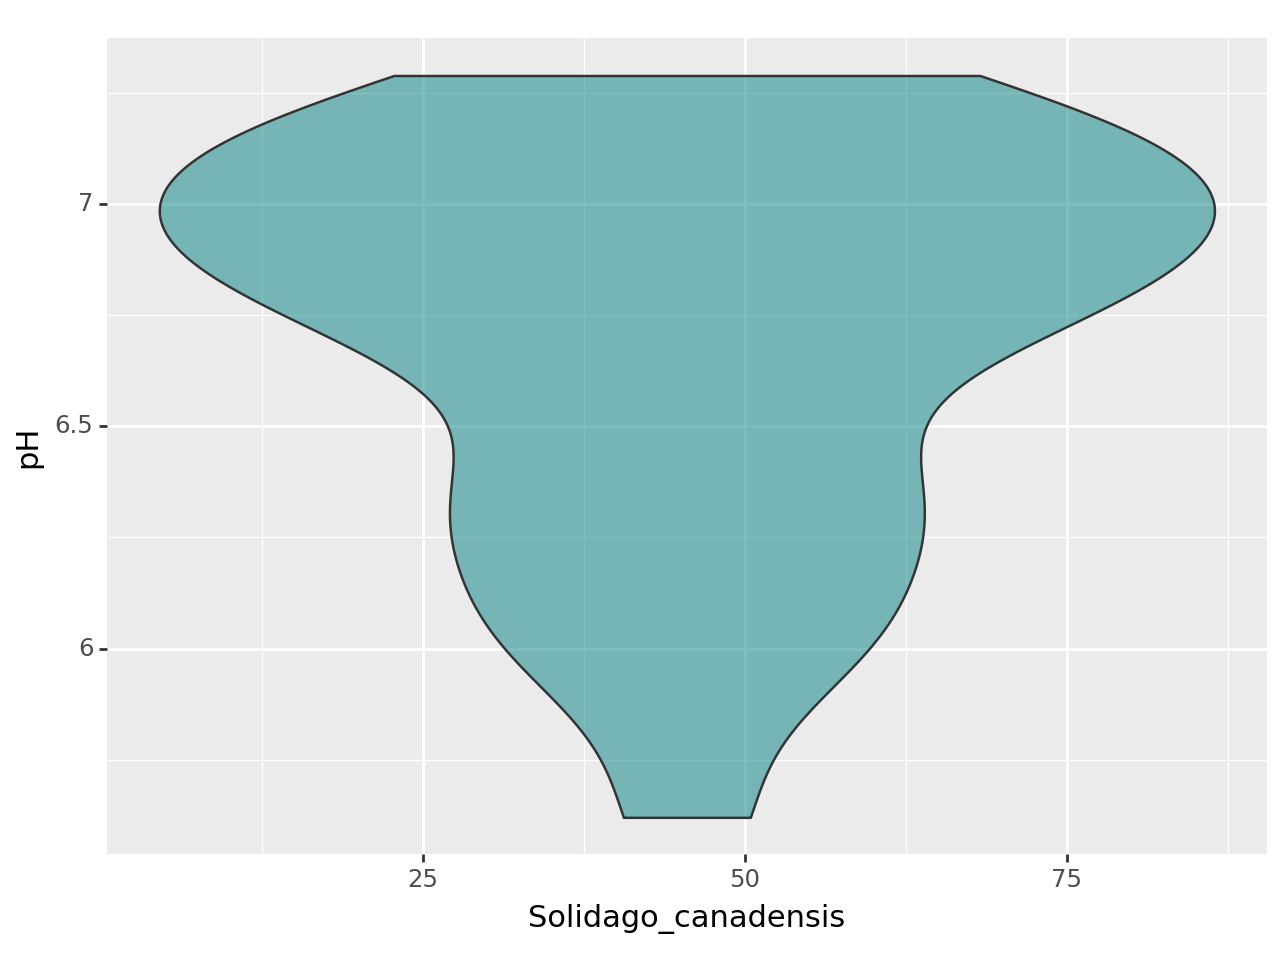

<Figure Size: (640 x 480)>

In [90]:
(p9.ggplot(
    data = mean_df, 
    mapping = p9.aes(x = 'Solidago_canadensis', y = 'pH')
) + 
    p9.geom_violin(fill='teal',alpha=0.5))


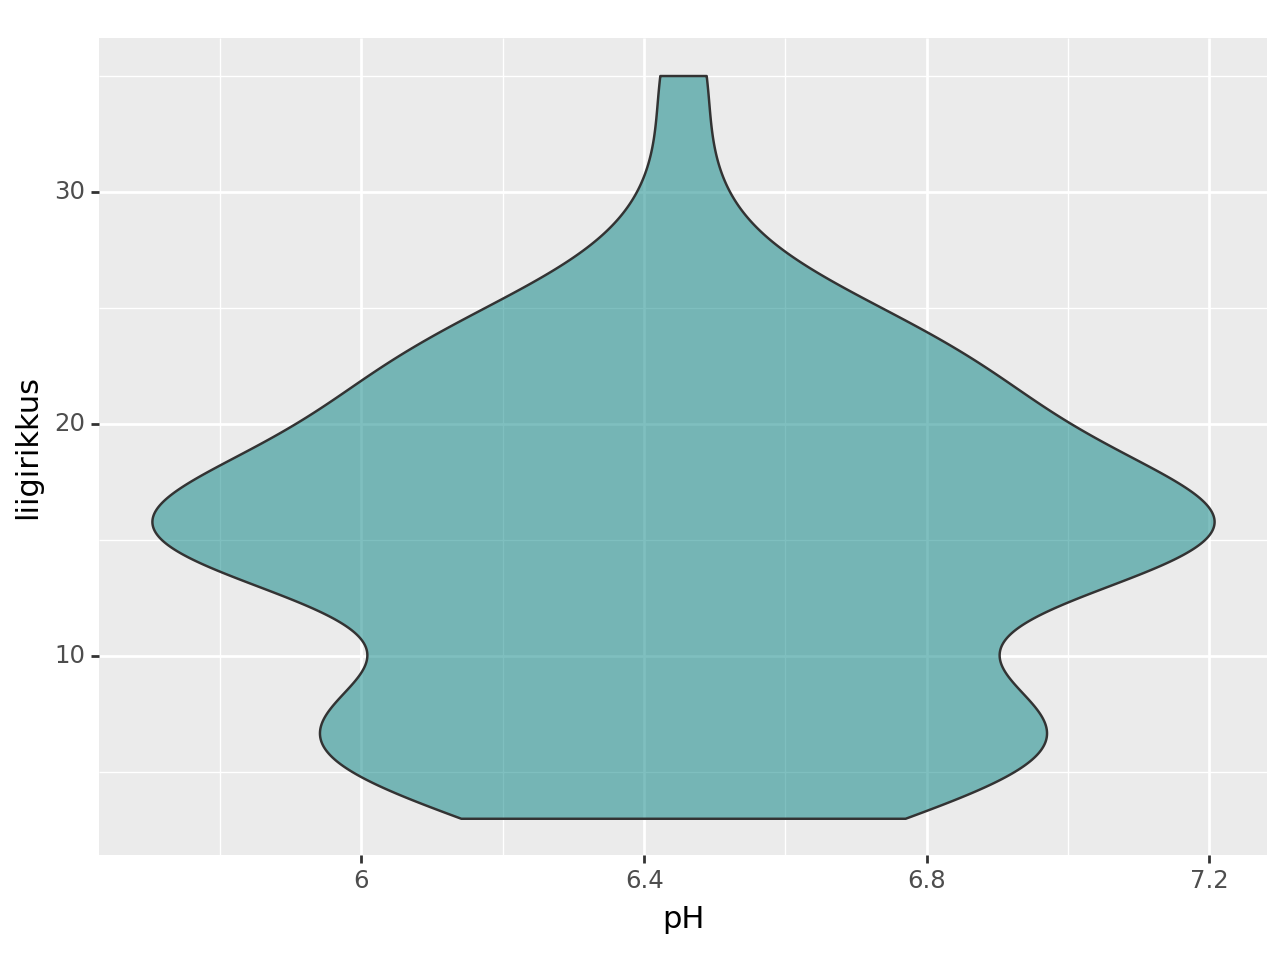

<Figure Size: (640 x 480)>

In [88]:
(p9.ggplot(
    data = mean_df, 
    mapping = p9.aes(y = 'liigirikkus', x = 'pH')
) + 
    p9.geom_violin(fill='teal',alpha=0.5))


C:\Anaconda\envs\IDS\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


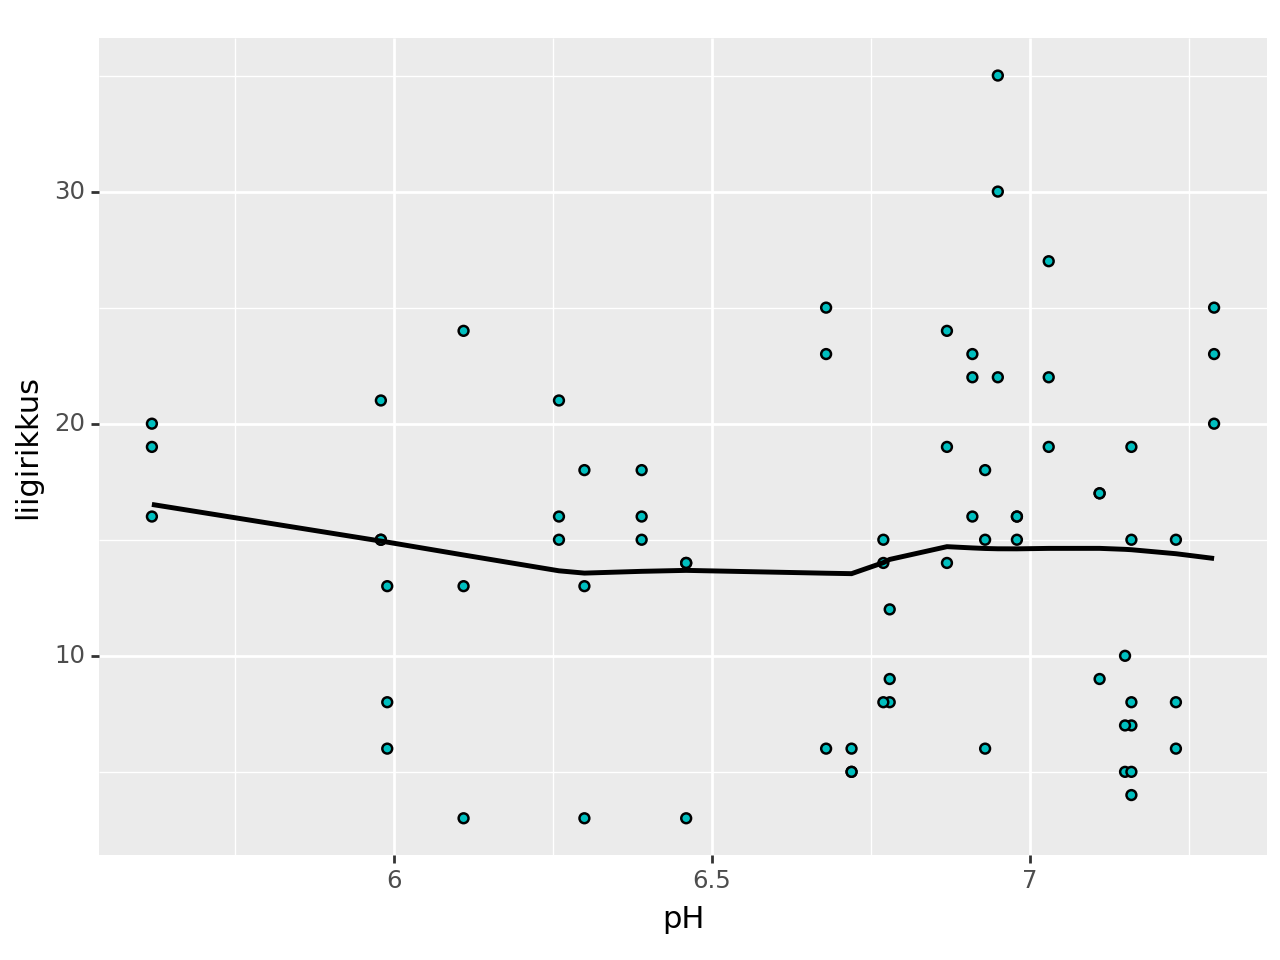

<Figure Size: (640 x 480)>

In [92]:
(
p9.ggplot(
    data = mean_df, 
    mapping = p9.aes(y = 'liigirikkus', x = 'pH')
) + 
    p9.geom_point(fill='c')
    +p9.geom_smooth(fill='m')
)

C:\Anaconda\envs\IDS\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


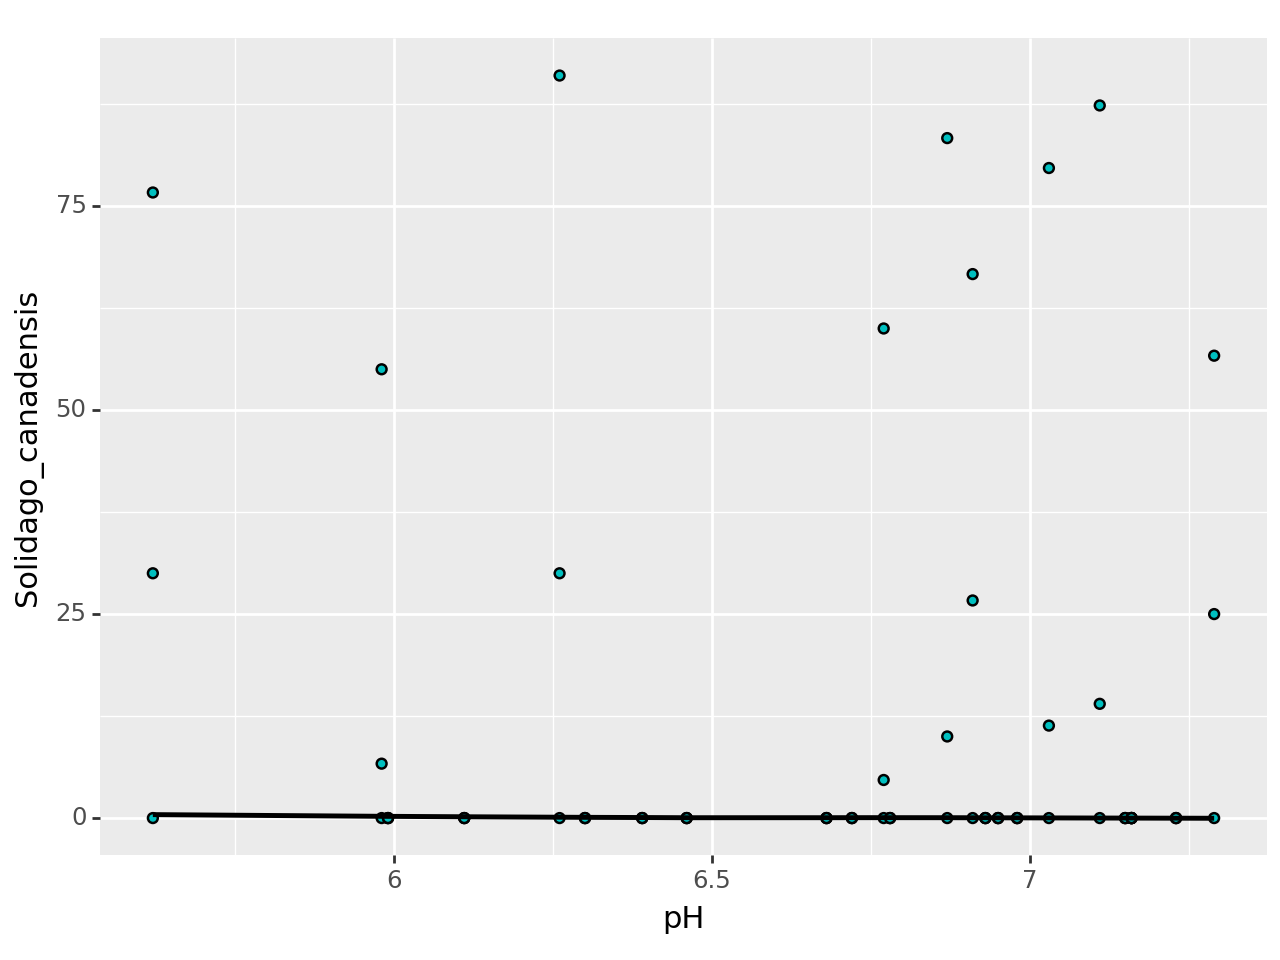

<Figure Size: (640 x 480)>

In [86]:
(
p9.ggplot(
    data = mean_df, 
    mapping = p9.aes(y = 'Solidago_canadensis', x = 'pH')
) + 
    p9.geom_point(fill='c')
    +p9.geom_smooth(fill='m')
)

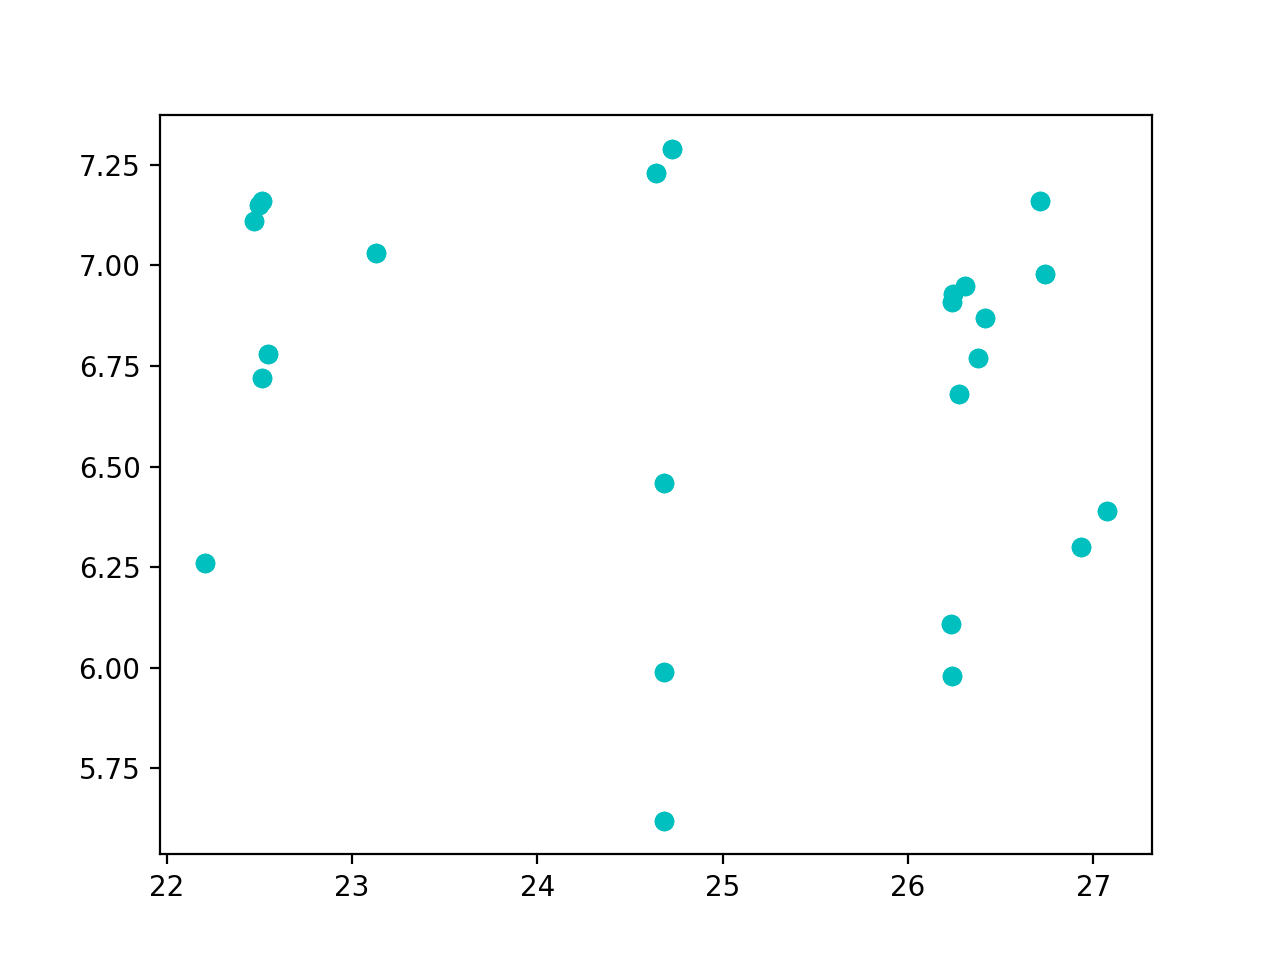

In [113]:
plt.plot(koord.lon,mean_df.pH,'co')
plt.show()

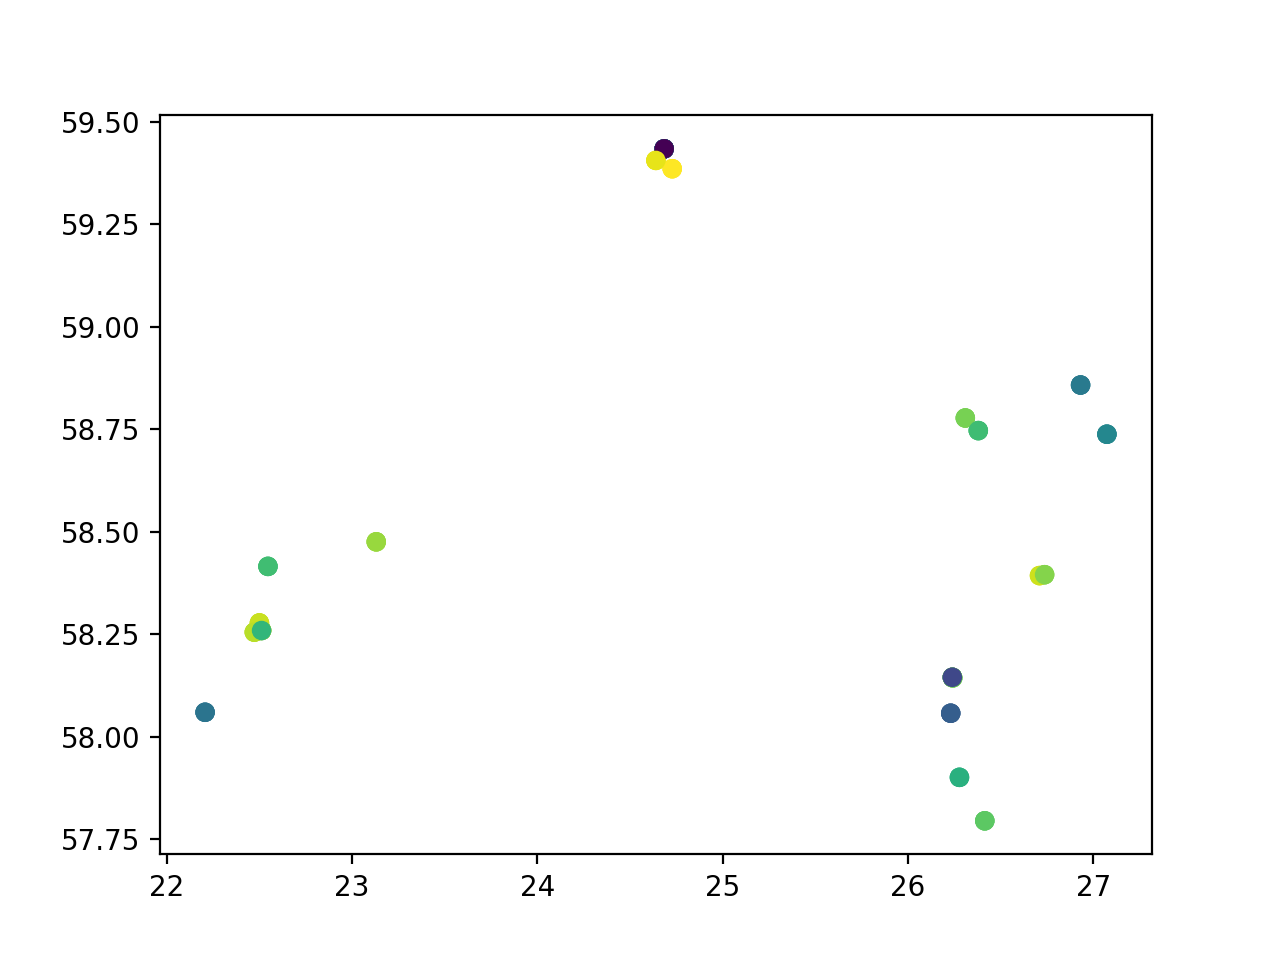

In [114]:
plt.scatter(koord.lon,koord.lat,c=mean_df.pH, cmap='viridis')
plt.show()